## **Análisis Exploratorio de Datos (EDA)**

El EDA tuvo como objetivo comprender la naturaleza de los datos y analizar qué variables influyen en el precio de los vehículos.

Sabíamos desde el inicio que variables como:

* Año del vehículo (year)

* Kilometraje (odometer)

tienen una relación directa con el precio, ya que:

Autos más recientes tienden a tener mayor valor.

Autos con mayor kilometraje tienden a depreciarse.

Por ello, el enfoque del análisis no se limitó a confirmar estas relaciones conocidas, sino que se orientó a identificar otras variables clave que pudieran aportar poder predictivo al modelo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style("whitegrid")

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/dataset/vehicles.parquet')

## **Distribución de variables numéricas clave en el mercado de autos usados**

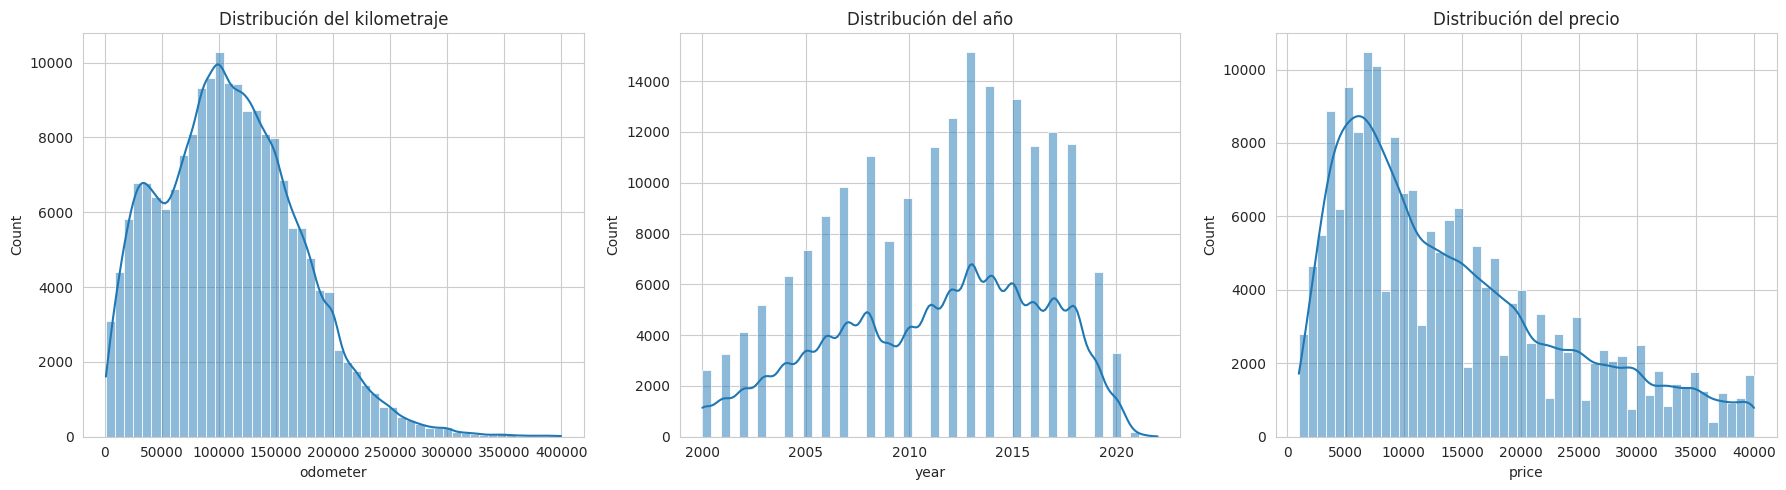

In [ ]:
cols = ['odometer', 'year', 'price']
titles = ['Distribución del kilometraje','Distribución del año','Distribución del precio']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col,title in zip(axes, cols,titles):
    sns.histplot(data = df, x = col, bins = 50, kde = True, ax=ax)

    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
df.query('price>=35_000')

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
17,39590,2020.0,chevrolet,good,8_or_more,gas,19160.0,clean,other,fwd,pickup,red
22,35000,2019.0,toyota,excellent,5_6_cyl,gas,43000.0,clean,automatic,4wd,truck,grey
24,38590,2011.0,chevrolet,good,8_or_more,gas,30237.0,clean,other,rwd,other,red
29,37990,2016.0,chevrolet,good,8_or_more,gas,9704.0,clean,other,rwd,coupe,red
36,38990,2020.0,ford,good,5_6_cyl,gas,12231.0,clean,other,fwd,pickup,white
...,...,...,...,...,...,...,...,...,...,...,...,...
186489,38995,2018.0,ram,excellent,8_or_more,gas,8423.0,rebuilt,automatic,4wd,truck,white
186547,39900,2015.0,ram,unknown,unknown,gas,107631.0,clean,automatic,4wd,sedan,white
186562,36999,2020.0,ford,unknown,unknown,other,51250.0,clean,automatic,rwd,van,white
186586,35990,2020.0,cadillac,good,unknown,other,8852.0,clean,other,fwd,hatchback,silver


En el histograma de precios se observa una cola derecha que supera los 35,000 dólares, la cual corresponde principalmente a vehículos tope de gama, con mayores capacidades mecánicas, mejor equipamiento y, en muchos casos, menor antigüedad.

## **¿Qué características del vehículo están más asociadas al precio en el mercado de autos usados?**

In [ ]:
corr = df.select_dtypes(include=['int','float']).corr()

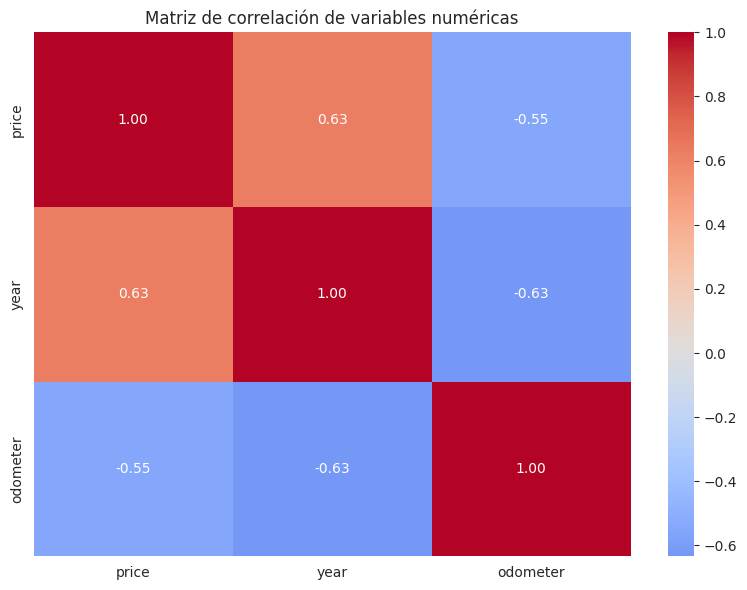

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0
)
plt.title('Matriz de correlación de variables numéricas')
plt.tight_layout()
plt.show()

In [ ]:
serie = df.groupby('year')['price'] \
.mean() \
.sort_values(ascending=False)

Debido a la gran cantidad de observaciones, la gráfica de dispersión entre el precio y el año del vehículo presenta una alta saturación visual, lo que dificulta identificar patrones claros. Por ello, se construyó una serie de Pandas que resume el precio promedio por año de fabricación, permitiendo observar de forma más clara la tendencia temporal del precio en el mercado de autos usados.

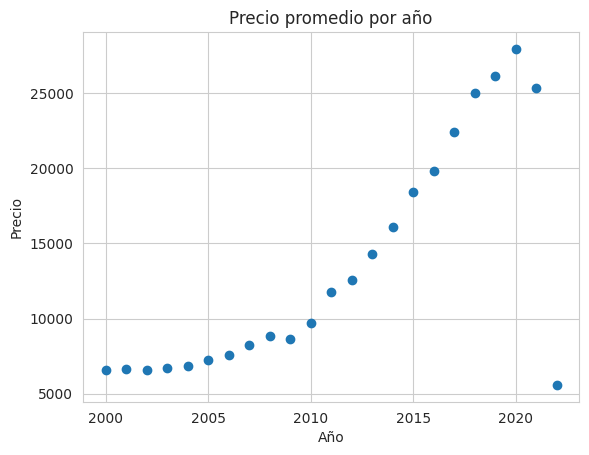

In [ ]:


plt.title('Precio promedio por año')
plt.scatter(serie.index,serie.values)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

In [ ]:
df.query('year>=2021')

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
172,32186,2021.0,toyota,unknown,unknown,gas,1443.0,clean,automatic,rwd,sedan,white
346,21334,2021.0,toyota,unknown,unknown,gas,7277.0,clean,automatic,fwd,sedan,white
382,22602,2021.0,toyota,unknown,unknown,gas,10883.0,clean,automatic,fwd,sedan,red
873,1000,2021.0,ford,fair,unknown,other,1400.0,clean,other,fwd,bus,green
1185,29668,2021.0,gmc,unknown,unknown,gas,1402.0,clean,automatic,fwd,sedan,white
...,...,...,...,...,...,...,...,...,...,...,...,...
179961,26995,2021.0,honda,good,4_or_less,gas,3031.0,clean,other,fwd,sedan,grey
181938,30434,2021.0,chevrolet,excellent,4_or_less,gas,2894.0,clean,automatic,fwd,SUV,silver
184144,13950,2021.0,ford,new,4_or_less,gas,3000.0,lien,automatic,fwd,hatchback,grey
184389,15000,2021.0,chevrolet,unknown,unknown,gas,6090.0,salvage,automatic,4wd,SUV,grey


Se observa que los modelos posteriores al año 2020 presentan un precio promedio considerablemente más bajo en comparación con años anteriores. Sin embargo, este comportamiento no refleja una tendencia real del mercado, sino que está asociado a la baja cantidad de observaciones disponibles para esos años, lo que introduce inestabilidad en la estimación del promedio.

## **¿Qué factores técnicos y comerciales explican las diferencias de precio entre vehículos con características similares de antigüedad y uso?**

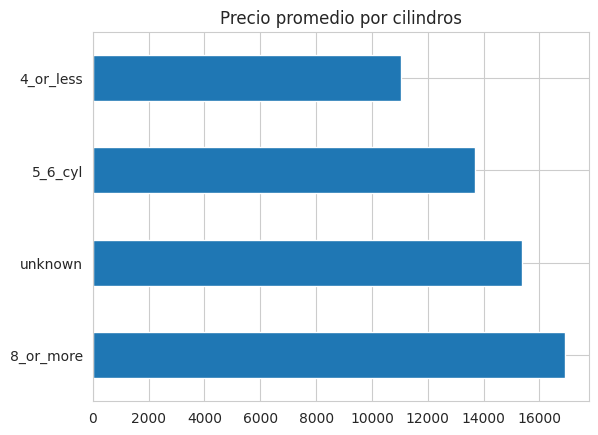

In [ ]:
df.groupby('cylinders')['price'] \
.mean() \
.sort_values(ascending=False) \
.plot(kind = "barh",title="Precio promedio por cilindros")
plt.ylabel(None)
plt.show()

Considerando la variable cylinders y las transformaciones realizadas, y en ausencia de la categoría “unknown”, se observa una tendencia consistente en los vehículos de combustión interna: a igualdad de año y kilometraje, aquellos con mayor número de cilindros tienden a presentar precios más altos. Por ejemplo, un Toyota Camry 2014 con motor de 2.4 litros suele tener un valor inferior al de su versión V6 de 3.5 litros, aun cuando ambos comparten un año de fabricación y un kilometraje similar.

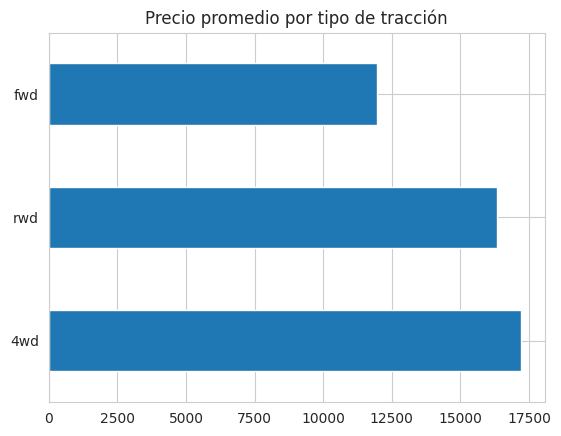

In [ ]:
df.groupby('drive')['price'] \
.mean() \
.sort_values(ascending=False) \
.plot(kind = "barh",title="Precio promedio por tipo de tracción")
plt.ylabel(None)
plt.show()

Los vehículos con tracción integral (AWD/4WD) muestran un precio promedio superior al de aquellos con tracción delantera, debido a la mayor complejidad mecánica y cantidad de componentes involucrados en el sistema de tracción.

In [ ]:
df = df[~((df['title_status'] == 'lien') & (df['year'] < 2018))]

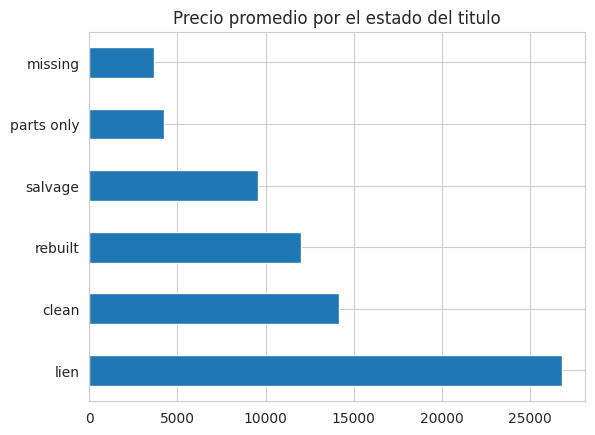

In [ ]:
df.groupby('title_status')['price'] \
.mean() \
.sort_values(ascending=False) \
.plot(kind = "barh",title="Precio promedio por el estado del titulo")
plt.ylabel(None)
plt.show()

Se eliminaron los vehículos con lien title correspondientes a años anteriores a 2018, ya que en el mercado de autos usados este tipo de gravamen es poco frecuente en vehículos antiguos y suele indicar registros desactualizados o inconsistencias en la información.
Por el contrario, los vehículos más recientes con lien title fueron conservados, ya que es común que correspondan a modelos relativamente nuevos cuyos propietarios aún se encuentran pagando el financiamiento. En estos casos, el mayor precio observado se explica por la antigüedad reducida del vehículo y no por la presencia del gravamen en sí.

In [ ]:
df[df.title_status=='lien']

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
1595,25800,2020.0,jeep,like new,4_or_less,gas,7900.0,lien,automatic,fwd,other,black
1794,20000,2020.0,kia,like new,4_or_less,gas,16362.0,lien,automatic,fwd,sedan,blue
3170,19900,2019.0,nissan,excellent,4_or_less,gas,19291.0,lien,automatic,4wd,SUV,silver
3729,31500,2021.0,toyota,like new,4_or_less,gas,2500.0,lien,automatic,4wd,SUV,silver
3926,19900,2019.0,kia,excellent,4_or_less,gas,33874.0,lien,automatic,4wd,SUV,silver
...,...,...,...,...,...,...,...,...,...,...,...,...
184073,19995,2019.0,honda,unknown,unknown,gas,25000.0,lien,automatic,fwd,sedan,white
184144,13950,2021.0,ford,new,4_or_less,gas,3000.0,lien,automatic,fwd,hatchback,grey
186375,18500,2019.0,ford,like new,4_or_less,gas,32000.0,lien,automatic,fwd,sedan,white
186413,19900,2020.0,volkswagen,like new,4_or_less,gas,4915.0,lien,manual,fwd,sedan,white


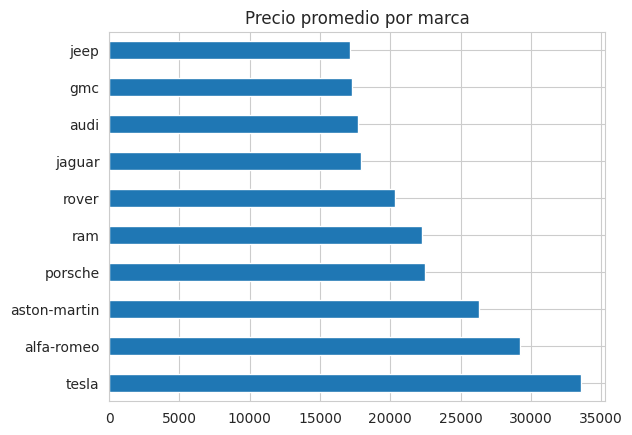

In [ ]:
serie = df.groupby('manufacturer')['price'] \
.mean() \
.sort_values(ascending=False).head(10) \
.plot(kind = "barh",title="Precio promedio por marca")
plt.ylabel(None)
plt.show()

Al calcular el precio promedio por marca, se observa que las marcas premium europeas se mantienen consistentemente en los rangos de precio más altos, lo cual es coherente con su posicionamiento histórico en términos de calidad de materiales, desempeño y prestigio de marca.

No obstante, también destacan marcas como Jeep, RAM y Tesla, que si bien no son consideradas premium en el sentido tradicional, presentan precios promedio elevados por razones estructurales distintas. En el caso de Jeep y RAM, ambos pertenecientes al grupo Stellantis (Mopar), su enfoque en SUVs y pickups, vehículos con mayor tamaño, capacidad mecánica y demanda en el mercado estadounidense, eleva de forma natural su valor promedio.

Por otro lado, Tesla muestra precios elevados debido a su condición de fabricante de vehículos eléctricos, incorporando tecnologías como sistemas avanzados de asistencia a la conducción y conducción autónoma, así como un posicionamiento tecnológico más que de lujo convencional.

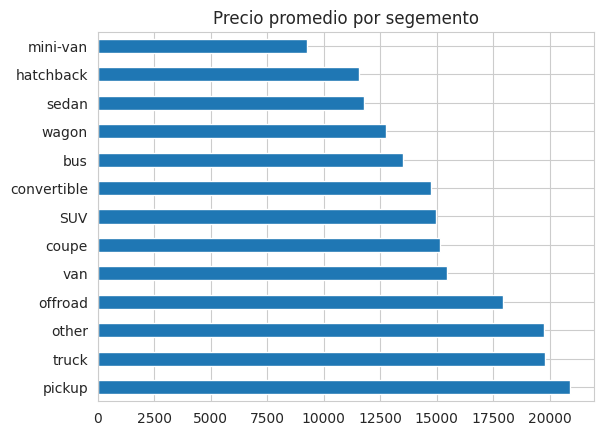

In [ ]:
serie = df.groupby('type')['price'] \
.mean() \
.sort_values(ascending=False) \
.plot(kind = "barh",title="Precio promedio por segemento")
plt.ylabel(None)
plt.show()

Las categorías con precios promedio más altos corresponden principalmente a pickups, trucks y camionetas de trabajo pesado (heavy duty), así como a vehículos off-road. En general, estos modelos presentan un mayor valor debido a sus características mecánicas superiores, como motores de mayor capacidad, sistemas de tracción más complejos y mayor peso vehicular, lo que incrementa tanto su costo de producción como su valor en el mercado de autos usados.

## **Conclusion**


El análisis exploratorio del mercado de autos usados muestra que el precio está influenciado por múltiples factores estructurales, más allá de las variables tradicionalmente evidentes como el año del vehículo y el kilometraje. Si bien estas últimas presentan una relación predecible con el precio, el estudio revela que el tipo de vehículo, la configuración mecánica y el posicionamiento de mercado de la marca desempeñan un papel determinante en la formación del valor.

Las pickups, camionetas de trabajo pesado y vehículos off-road concentran los precios promedio más elevados, lo cual se explica por sus mayores capacidades mecánicas, peso vehicular y orientación a tareas de carga y remolque, altamente demandadas en el mercado estadounidense. De manera similar, los sistemas de tracción integral (AWD/4WD) y motores con mayor número de cilindros tienden a asociarse con precios superiores, reflejando un mayor costo tecnológico y funcional.

Asimismo, el análisis por marca evidencia que, además de las marcas premium europeas, fabricantes como Jeep, RAM y Tesla alcanzan precios promedio elevados debido a su enfoque en segmentos específicos: SUVs y pickups en el caso de Jeep y RAM, y tecnología eléctrica avanzada en el caso de Tesla. Esto confirma que el precio no responde únicamente al estatus de marca, sino al tipo de producto que cada fabricante ofrece.

Finalmente, el tratamiento de valores atípicos y categorías problemáticas —como la exclusión de títulos lien en vehículos antiguos y la agrupación adecuada de cilindros— permitió reducir ruido en los datos y obtener relaciones más consistentes. En conjunto, estos hallazgos establecen una base sólida para el desarrollo de modelos predictivos más robustos, donde variables mecánicas, estructurales y de mercado juegan un rol clave en la estimación del precio de autos usados.